In [ ]:
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tf

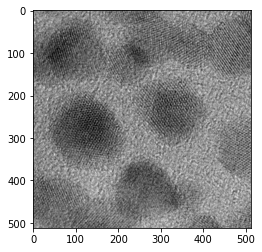

In [ ]:
image = cv2.imread('/content/sample_data/US1000FTXP2387.jpg')
image = cv2.resize(image,(512,512), interpolation = cv2.INTER_NEAREST)
image = image/np.max(image)
plt.imshow(image)

In [ ]:
model = KMeans(n_clusters=5, n_init=50).fit(image.reshape(-1,1))
mam = model.predict(image.reshape(-1,1))

In [ ]:
mam = mam.reshape(2048,2048,3)

In [ ]:
plt.imsave('image.png',image)

ValueError: ignored

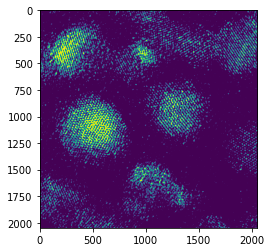

In [ ]:
plt.imshow(mam[...,0]==4)

In [12]:
input_layer = tf.Input(shape=(512,512,3))
x = tf.layers.Conv2D(512,(2,2), activation='relu', strides=(1,1))(input_layer)
#x = tf.layers.MaxPool2D((4,4), strides=(2,2))(x)
#x = tf.layers.Conv2D(32,(3,3), strides=(1,1), activation='relu')(x)
x = tf.layers.MaxPool2D((2,2), strides=(2,2))(x)
#x = tf.layers.Conv2D(256,(3,3), strides=(1,1), activation='relu')(x)
#x = tf.layers.MaxPool2D((4,4), strides=(2,2))(x)
x = tf.layers.Conv2D(128,(2,2), activation='relu', strides=(1,1))(x)
x = tf.layers.MaxPool2D((2,2), strides=(2,2))(x)
x = tf.layers.Conv2D(64,(2,2), activation='relu', strides=(1,1))(x)
x = tf.layers.MaxPool2D((2,2), strides=(2,2))(x)
x = tf.layers.Conv2D(512,(1,1), activation='relu', strides=(1,1))(x)
x = tf.layers.MaxPool2D((2,2), strides=(2,2))(x)
x = tf.layers.UpSampling2D((4,4))(x)
x = tf.layers.Conv2D(128,(2,2), activation='relu', strides=(1,1))(x)
x = tf.layers.MaxPool2D((2,2), strides=(2,2))(x)
x = tf.layers.UpSampling2D((4,4))(x)
x = tf.layers.Conv2D(256,(2,2), activation='relu', strides=(1,1))(x)
x = tf.layers.MaxPool2D((2,2), strides=(2,2))(x)
x = tf.layers.UpSampling2D((4,4))(x)
x = tf.layers.Conv2D(512,(2,2), activation='relu', strides=(1,1))(x)
x = tf.layers.MaxPool2D((2,2), strides=(2,2))(x)
x = tf.layers.UpSampling2D((2,2))(x)
x = tf.layers.Conv2D(3,(1,1), padding='same', strides=(1,1))(x)
x = tf.layers.experimental.preprocessing.Resizing(512, 512, interpolation="nearest")(x)
model = tf.Model(input_layer, x)
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 511, 511, 512)     6656      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 255, 255, 512)     0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 254, 254, 128)     262272    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 126, 126, 64)      32832     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 64)       

In [ ]:
model.compile(loss='mse', optimizer='nadam', metrics='mse')
model.fit(image.reshape(1,512,512,3),image.reshape(1,512,512,3), epochs=30, batch_size=1)

Epoch 1/30
1/1 [==============================] - 0s 1ms/step - loss: 0.2505 - mse: 0.2505
Epoch 2/30
1/1 [==============================] - 0s 1ms/step - loss: 0.1786 - mse: 0.1786
Epoch 3/30
1/1 [==============================] - 0s 1ms/step - loss: 0.0406 - mse: 0.0406
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 0.1536 - mse: 0.1536
Epoch 5/30
1/1 [==============================] - 0s 2ms/step - loss: 0.0424 - mse: 0.0424
Epoch 6/30
1/1 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 7/30
1/1 [==============================] - 0s 1ms/step - loss: 0.1577 - mse: 0.1577
Epoch 8/30
1/1 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 9/30
1/1 [==============================] - 0s 1ms/step - loss: 0.0467 - mse: 0.0467
Epoch 10/30
1/1 [==============================] - 0s 2ms/step - loss: 0.0194 - mse: 0.0194
Epoch 11/30
1/1 [==============================] - 0s 2ms/step - loss: 0.0216 - mse: 0.02

In [7]:
a = model.predict(image.reshape(1,512,512,3))


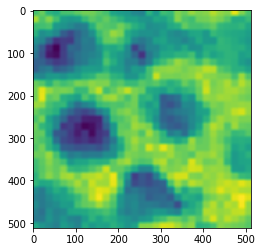

In [10]:
plt.imshow(a.reshape(512,512,3)[...,1])

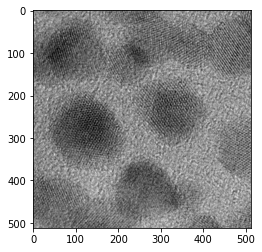

In [ ]:
plt.imshow(image)
